<a href="https://colab.research.google.com/github/belmufti/belmufti/blob/main/Code_Happy_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [4]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
   # train_y = train_y.reshape((1, train_x.shape[0]))
   # test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [8]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("/content/train_happy.h5","/content/test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255


Y_train = Y_train_orig
Y_test = Y_test_orig


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600,)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150,)


Image shape : (64, 64, 3)


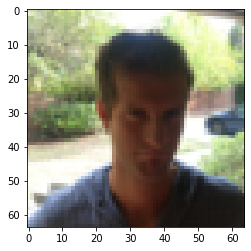

In [10]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[11])

# Building Model

In [24]:

model = Sequential([Conv2D(filters=32, kernel_size=(...(2)...,...(2)...), activation='relu', padding='same', input_shape=(64, 64, 3)),
                        BatchNormalization(),
                        MaxPooling2D(pool_size=(2,2)),
                        Dropout(0.2),
                        Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='valid'),
                        BatchNormalization(),
                        MaxPooling2D(pool_size=(2, 2)),
                        Dropout(0.2),
                        Flatten(),
                        #Dense(128, activation='relu'),
                        Dense(1, activation='sigmoid')
                     
                     ])
    

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        4624      
                                                                 
 batch_normalization_5 (Batc  (None, 30, 30, 16)      

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [26]:
from keras.callbacks import EarlyStopping
mycallbacks = [EarlyStopping(monitor='val_accuracy', patience=5)]

In [29]:
history_model = model.fit(X_train, Y_train,validation_data=(X_test, Y_test) , epochs=30, batch_size=32,verbose=1,callbacks=mycallbacks)

Epoch 1/30
19/19 [==============================] - 5s 281ms/step - loss: 0.0340 - accuracy: 0.9883 - val_loss: 0.3294 - val_accuracy: 0.8400
Epoch 2/30
19/19 [==============================] - 5s 276ms/step - loss: 0.0415 - accuracy: 0.9867 - val_loss: 0.3942 - val_accuracy: 0.8333
Epoch 3/30
19/19 [==============================] - 5s 275ms/step - loss: 0.0741 - accuracy: 0.9800 - val_loss: 0.5870 - val_accuracy: 0.7400
Epoch 4/30
19/19 [==============================] - 5s 276ms/step - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.3259 - val_accuracy: 0.8333
Epoch 5/30
19/19 [==============================] - 5s 275ms/step - loss: 0.0776 - accuracy: 0.9700 - val_loss: 0.1340 - val_accuracy: 0.9600
Epoch 6/30
19/19 [==============================] - 5s 274ms/step - loss: 0.1413 - accuracy: 0.9483 - val_loss: 0.5172 - val_accuracy: 0.7733
Epoch 7/30
19/19 [==============================] - 5s 273ms/step - loss: 0.0913 - accuracy: 0.9650 - val_loss: 0.1717 - val_accuracy: 0.9667
Epoch 

# Evaluate / Test

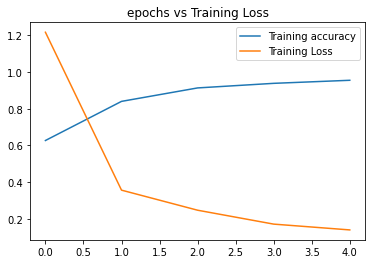

In [ ]:
train_accuracy = history_model.history[None]
train_loss = history_model.history[None]

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [ ]:
# Code Here

Confusion Matrix

In [ ]:
# Code Here

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)
